<a href="https://colab.research.google.com/github/dingandrew/Bacteria-Counter/blob/master/src/processRawImage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
!ls "/content/drive/My Drive/Colab Notebooks/rawpictures"
!ls "/content"

IMG-3258.JPG  IMG-3265.JPG  IMG-3272.JPG  IMG-3279.JPG	IMG-3286.JPG
IMG-3259.JPG  IMG-3266.JPG  IMG-3273.JPG  IMG-3280.JPG	IMG-3287.JPG
IMG-3260.JPG  IMG-3267.JPG  IMG-3274.JPG  IMG-3281.JPG	IMG-3288.JPG
IMG-3261.JPG  IMG-3268.JPG  IMG-3275.JPG  IMG-3282.JPG	IMG-3289.JPG
IMG-3262.JPG  IMG-3269.JPG  IMG-3276.JPG  IMG-3283.JPG	IMG-3290.JPG
IMG-3263.JPG  IMG-3270.JPG  IMG-3277.JPG  IMG-3284.JPG
IMG-3264.JPG  IMG-3271.JPG  IMG-3278.JPG  IMG-3285.JPG
drive  sample_data


In [0]:
import cv2
import sys
import os, os.path
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split


'''
'''
def createDataSet(path = "../data/rawpictures"):
	image_list = []
	valid_images = [".jpg",".gif",".png",".tga"]

	for f in os.listdir(path):
		print( f)
		ext = os.path.splitext(f)[1]
		if ext.lower() not in valid_images:
			continue
		id_img_count = []
		id_img_count.append(f)
		id_img_count.append(cv2.imread(os.path.join(path,f)))
		id_img_count.append(0)
		#image_list.append(Image.open(os.path.join(path,f)))
		#image_list.append(cv2.imread(os.path.join(path,f)))
		image_list.append(id_img_count)

	return pd.DataFrame(image_list, columns=["ID", "IMAGE", "COUNT"])
'''
'''
def processImage(img):	
	print("Converting")
	plt.imshow(img)
	plt.show()
	img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
 	#detect circles in the image
	circles = cv2.HoughCircles(img_gray, cv2.HOUGH_GRADIENT, 
								7, 3000)

	print(circles)

	# ensure at least some circles were found
	if circles is not None and len(circles) == 1:
		# convert the (x, y) coordinates and radius of the circles 
		# to integers
		circles = np.round(circles[0, :]).astype("int")

		# loop over the (x, y) coordinates and radius of the circles
		for (x, y, r) in circles:
			# draw the circle in the output image, then draw 
			# a rectangle corresponding to the center of the 
			# circle
			cv2.circle(img_gray, (x, y), r, (0, 255, 0), 4)
			cv2.rectangle(img_gray, 
			(x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)
		
			#crop image
			rectX = (x - r)
			rectY = (y - r)
			img_gray[rectX, rectY] = 0
			img_gray = img_gray[rectY:(rectY + (2 * r))
						,rectX:(rectX + (2 * r))]
		

			mask = np.zeros(img.shape,dtype=np.uint8)
			cv2.circle(mask,(x,y),r,(255,255,255),-1,8,0)
			out = img*mask
			white = 255-mask
			img_gray = out + white

		# show the output image
		#cv2.imshow("img", np.hstack([img_gray, img]))
		#cv2.imshow("img_gray", img_gray)
		#if cv2.waitKey(1) & 0xFF == ord('y'):
		#	cv2.destroyAllWindows()
		plt.imshow(img_gray, cmap=plt.cm.binary)
		plt.show()


	else:
		print("ERROR: Petri Dish Not Found")


	img_gray = cv2.bitwise_not(img_gray)
	
	return img_gray 
'''
'''
def addCounts():

	return dataset

'''
'''
def saveAsCSV(df):
	df.drop("IMAGE", axis=1, inplace=True)
	df.to_csv('dataset1.csv', index=False)


def splitData(df):
	x = np.array(df["IMAGE"])
	y = np.array(df["COUNT"])
	x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)	
	return x_train, x_test, y_train, y_test 




IMG-3261.JPG
IMG-3260.JPG
IMG-3259.JPG
IMG-3267.JPG
IMG-3266.JPG
IMG-3265.JPG
IMG-3264.JPG
IMG-3263.JPG
IMG-3262.JPG
IMG-3272.JPG
IMG-3271.JPG
IMG-3270.JPG
IMG-3269.JPG
IMG-3268.JPG
IMG-3278.JPG
IMG-3277.JPG
IMG-3276.JPG
IMG-3275.JPG
IMG-3274.JPG
IMG-3273.JPG
IMG-3284.JPG
IMG-3283.JPG
IMG-3282.JPG
IMG-3281.JPG
IMG-3280.JPG
IMG-3279.JPG
IMG-3290.JPG
IMG-3289.JPG
IMG-3288.JPG
IMG-3287.JPG
IMG-3286.JPG
IMG-3285.JPG
IMG-3258.JPG
Converting


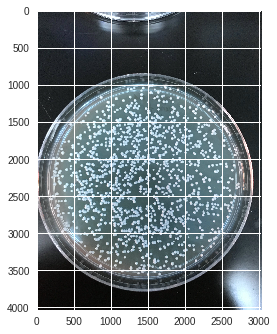

[[[1445.5    2285.5    1299.2001]]]


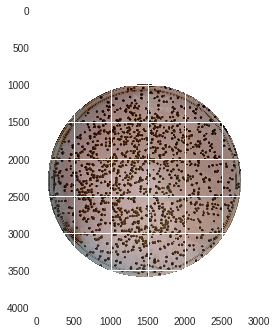

Converting


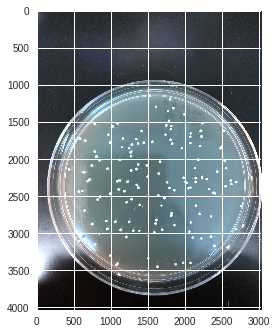

[[[1578.5 2334.5 1281. ]]]


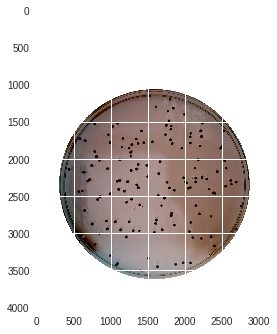

Converting


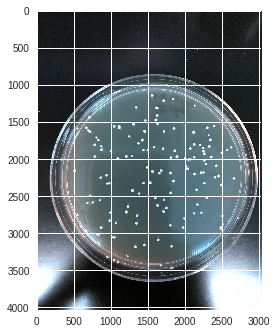

[[[1557.5    2236.5    1236.2001]]]


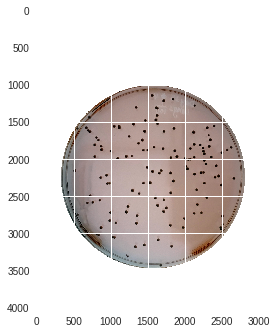

Converting


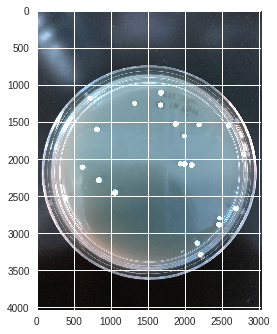

[[[1515.5 2173.5 1199.1]]]


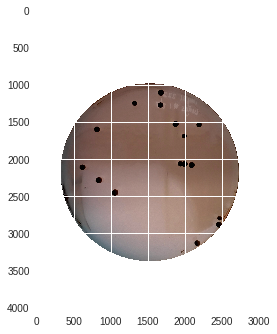

Converting


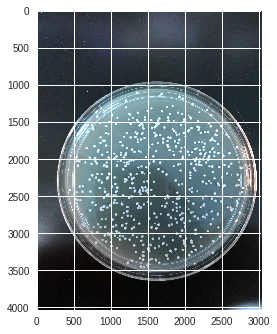

In [0]:
df = createDataSet("/content/drive/My Drive/Colab Notebooks/rawpictures")

df["IMAGE"] = df["IMAGE"].apply(processImage)


x_train, x_test, y_train, y_test = splitData(df) 


saveAsCSV(df)